In [1]:
import pandas as pd
import os
import janitor
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns; sns.set_style("darkgrid")
%matplotlib inline
import matplotlib.pyplot as plt

## Does the team with the highest FPL points win the premier league?

In [2]:
new_df = pd.read_excel("../data/fpl_data/full_df.xlsx")

In [3]:
new_df

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,value,was_home,yellow_cards,GW,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,starts,season
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,...,55,True,0,1,0.00,0.00,0.00,0.00,0,2020/21
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,...,50,True,0,1,0.00,0.00,0.00,0.00,0,2020/21
2,Aaron Mooy,MID,Brighton,0.0,0,0,0,0,0.0,60,...,50,True,0,1,0.00,0.00,0.00,0.00,0,2020/21
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,...,50,True,0,1,0.00,0.00,0.00,0.00,0,2020/21
4,Abdoulaye Doucouré,MID,Everton,1.3,0,0,20,1,44.6,512,...,55,False,0,1,0.00,0.00,0.00,0.00,0,2020/21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93194,Kyle Walker,DEF,Man City,3.7,0,0,16,0,36.5,369,...,55,False,0,23,0.12,0.14,0.02,1.02,1,2023/24
93195,Jacob Brown,FWD,Luton,-0.7,0,0,1,0,0.5,631,...,49,False,0,23,0.00,0.05,0.05,0.19,0,2023/24
93196,Vicente Guaita,GK,Crystal Palace,0.0,0,0,0,0,0.0,227,...,44,False,0,23,0.00,0.00,0.00,0.00,0,2023/24
93197,Braian Ojeda Rodríguez,MID,Nott'm Forest,0.0,0,0,0,0,0.0,459,...,45,False,0,23,0.00,0.00,0.00,0.00,0,2023/24


In [4]:
df_2020_21 = new_df[new_df["season"] == "2020/21"]
df_2021_22 = new_df[new_df["season"] == "2021/22"]
df_2022_23 = new_df[new_df["season"] == "2022/23"]
df_2023_24 = new_df[new_df["season"] == "2023/24"]

In [5]:
df_2020_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24365 entries, 0 to 24364
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        24365 non-null  object 
 1   position                    24365 non-null  object 
 2   team                        24365 non-null  object 
 3   xP                          24365 non-null  float64
 4   assists                     24365 non-null  int64  
 5   bonus                       24365 non-null  int64  
 6   bps                         24365 non-null  int64  
 7   clean_sheets                24365 non-null  int64  
 8   creativity                  24365 non-null  float64
 9   element                     24365 non-null  int64  
 10  fixture                     24365 non-null  int64  
 11  goals_conceded              24365 non-null  int64  
 12  goals_scored                24365 non-null  int64  
 13  ict_index                   24365 no

In [6]:
import pandas as pd
import numpy as np

def accumulated(df):
    # Add a column 'n' with all values set to 1
    df['n'] = 1
    
    # Group by 'name' and 'team'
    grouped = df.groupby(['name', 'team'])
    
    # Define the columns to apply the cumulative sum and then subtract the original value
    cols_to_accumulate = ['goals_scored', 'assists', 'ict_index', 'goals_conceded', 'minutes', 'own_goals', 'bps', 'clean_sheets', 'bonus']
    
    # Apply the cumulative sum and subtraction
    for col in cols_to_accumulate:
        df[col + '_cum'] = grouped[col].cumsum() - df[col]
    
    # For 'total_points', just the cumulative sum is needed
    df['total_points_cum'] = grouped['total_points'].cumsum()
    
    # Select the desired columns
    df = df[['name', 'team', 'position', 'goals_scored_cum', 'assists_cum', 'ict_index_cum', 'goals_conceded_cum', 'minutes_cum', 'own_goals_cum', 'total_points_cum', 'bps_cum', 'bonus_cum', 'clean_sheets_cum', 'GW', 'kickoff_time']]
    
    # Filter rows where 'ict_index_cum' > 0
    #df = df[df['ict_index_cum'] > 0]
    
    # Drop the temporary 'n' column
    #df.drop(columns=['n'], inplace=True)
    
    # Rename the accumulated columns back to their original names for clarity
    df.rename(columns={col + '_cum': col for col in cols_to_accumulate}, inplace=True)
    df.rename(columns={'total_points_cum': 'total_points'}, inplace=True)
    
    return df

In [7]:
df_2020_21c = accumulated(df_2020_21).reset_index(drop=True)
df_2021_22c = accumulated(df_2021_22).reset_index(drop=True)
df_2022_23c = accumulated(df_2022_23).reset_index(drop=True)
df_2023_24c = accumulated(df_2023_24).reset_index(drop=True)
df_2020_21c["season"] = "2020/21"
df_2021_22c["season"] = "2021/22"
df_2022_23c["season"] = "2022/23"
df_2023_24c["season"] ="2023/24"

In [8]:
#cumulative_data.to_excel("../data/fpl_data/cumulative_df.xlsx", index=False)

In [9]:
df_2020_21c = accumulated(df_2020_21).reset_index(drop=True)
#df_2020_21c

In [10]:
#df_2020_21c[df_2020_21c["GW"]==38].groupby("team", as_index=False)["total_points"].sum()

In [11]:
def fpl_rankings(df):
    dfc = accumulated(df).reset_index(drop=True)
    dfc = dfc[dfc["GW"]==38].groupby("team", as_index=False)["total_points"].sum().sort_values("total_points", ascending=False).reset_index(drop=True)
    return dfc

In [39]:
fpl_rank2020_21 = fpl_rankings(df_2020_21)
fpl_rank2020_21["season"] = "2020/21"
fpl_rank2020_21["fpl rank"] = fpl_rank2020_21.index + 1

In [40]:
fpl_rank2021_22 = fpl_rankings(df_2021_22)
fpl_rank2021_22["season"] = "2021/22"
fpl_rank2021_22["fpl rank"] = fpl_rank2021_22.index + 1

In [41]:
fpl_rank2022_23 = fpl_rankings(df_2022_23)
fpl_rank2022_23["season"] = "2022/23"
fpl_rank2022_23["fpl rank"] = fpl_rank2022_23.index + 1

In [42]:
fpl_ranks = pd.concat([fpl_rank2020_21, fpl_rank2021_22, fpl_rank2022_23], axis = 0).reset_index(drop=True)

In [43]:
fpl_ranks["team"].unique()

array(['Man City', 'Chelsea', 'Man Utd', 'Liverpool', 'Spurs',
       'Aston Villa', 'Leeds', 'West Ham', 'Leicester', 'Arsenal',
       'Everton', 'Brighton', 'Southampton', 'Wolves', 'Crystal Palace',
       'Burnley', 'Newcastle', 'Fulham', 'West Brom', 'Sheffield Utd',
       'Brentford', 'Watford', 'Norwich', "Nott'm Forest", 'Bournemouth'],
      dtype=object)

In [44]:
#df_2023_24[df_2023_24["name"] == "Mohamed Salah"]

In [45]:
table2020_21 = pd.read_excel("../data/premier_league_ranking/table_2020_21.xlsx")
table2021_22 = pd.read_excel("../data/premier_league_ranking/table_2021_22.xlsx")
table2022_23 = pd.read_excel("../data/premier_league_ranking/table_2022_23.xlsx")

In [46]:
table2020_21 = table2020_21[["Rank", "Team", "Points"]]
table2020_21["season"] = "2020/21"

In [47]:
table2021_22 = table2021_22[["Rank", "Team", "Points"]]
table2021_22["season"] = "2021/22"

In [48]:
table2022_23 = table2022_23[["Rank", "Team", "Points"]]
table2022_23["season"] = "2022/23"

In [49]:
tables = pd.concat([table2020_21, table2021_22, table2022_23], axis = 0).reset_index(drop=True)
tables["Team"].unique()

array(['Man City', 'Man Utd', 'Liverpool', 'Chelsea', 'Leicester',
       'West Ham', 'Spurs', 'Arsenal', 'Leeds Utd', 'Everton',
       'Aston Villa', 'Newcastle', 'Wolves', 'Crystal Palace',
       'Southampton', 'Brighton', 'Burnley', 'Fulham', 'West Brom',
       'Sheffield Utd', 'Brentford', 'Watford', 'Norwich', 'Bournemouth',
       'Nottingham Forest'], dtype=object)

In [50]:
tables["Team"] = tables["Team"].replace(["Leeds Utd", "Nottingham Forest"], ["Leeds", "Nott'm Forest"])

In [51]:
tables = tables.rename(columns={"Team":"team"})
fpl_points_w_tables = tables.merge(fpl_ranks, how = "inner", on = ["team", "season"])

In [61]:
fpl_points_w_tables.to_excel("../data/fpl_data/fpl_points_use.xlsx", index=False)

In [56]:
def fpl_vs_points(year):
    data = fpl_points_w_tables[fpl_points_w_tables["season"] == year]
    plt.figure(figsize=(15,8))
    sns.scatterplot(x = "total_points", y = "Points", data = data)
    plt.xlabel("FPL points")
    plt.ylabel("Points")
    plt.title("Premier League Points vs Actual Points for %s"%year)
    plt.show()

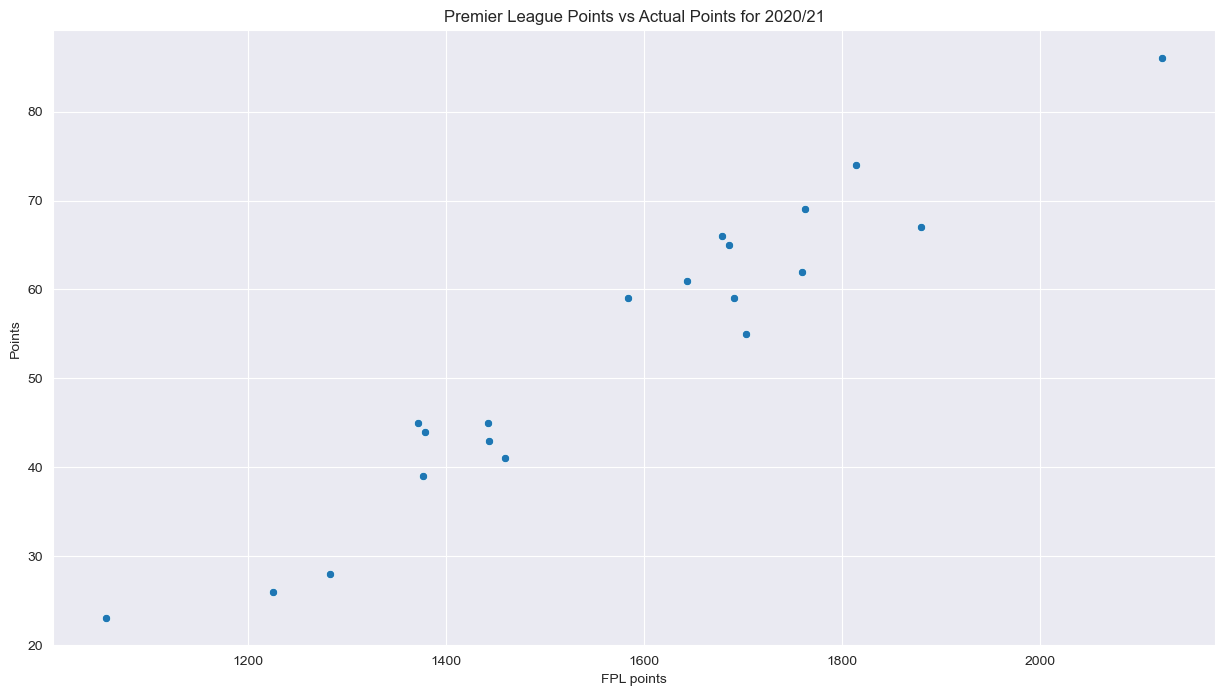

In [57]:
fpl_vs_points("2020/21")

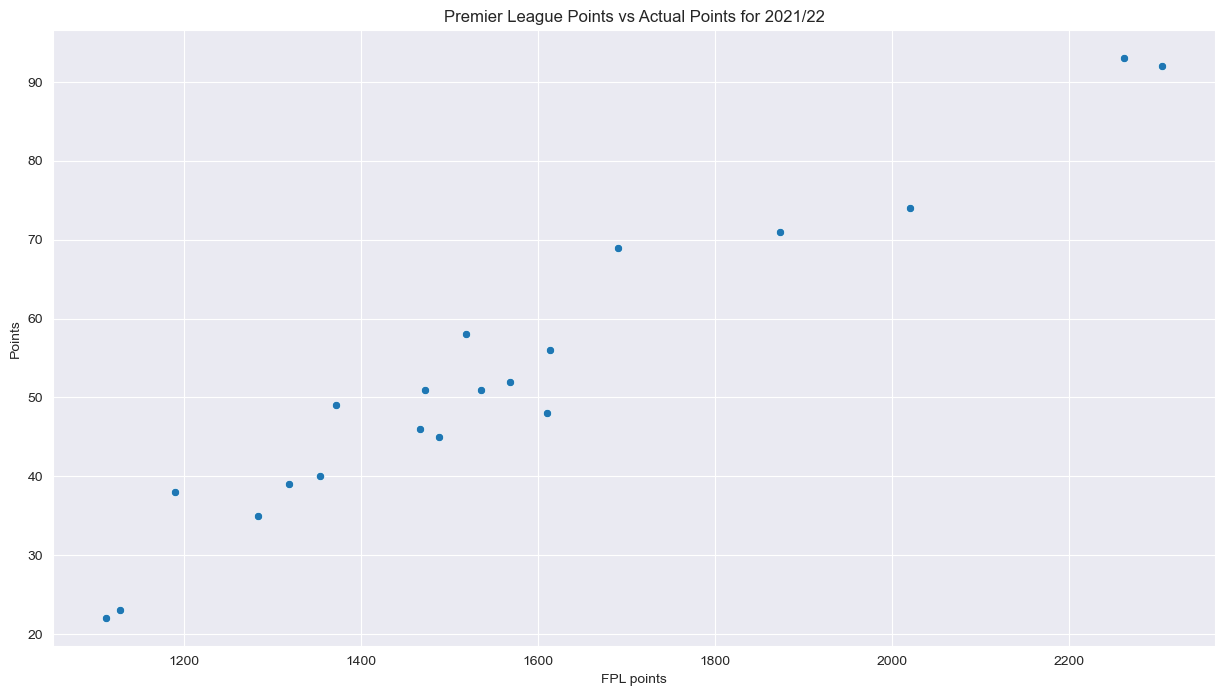

In [58]:
fpl_vs_points("2021/22")

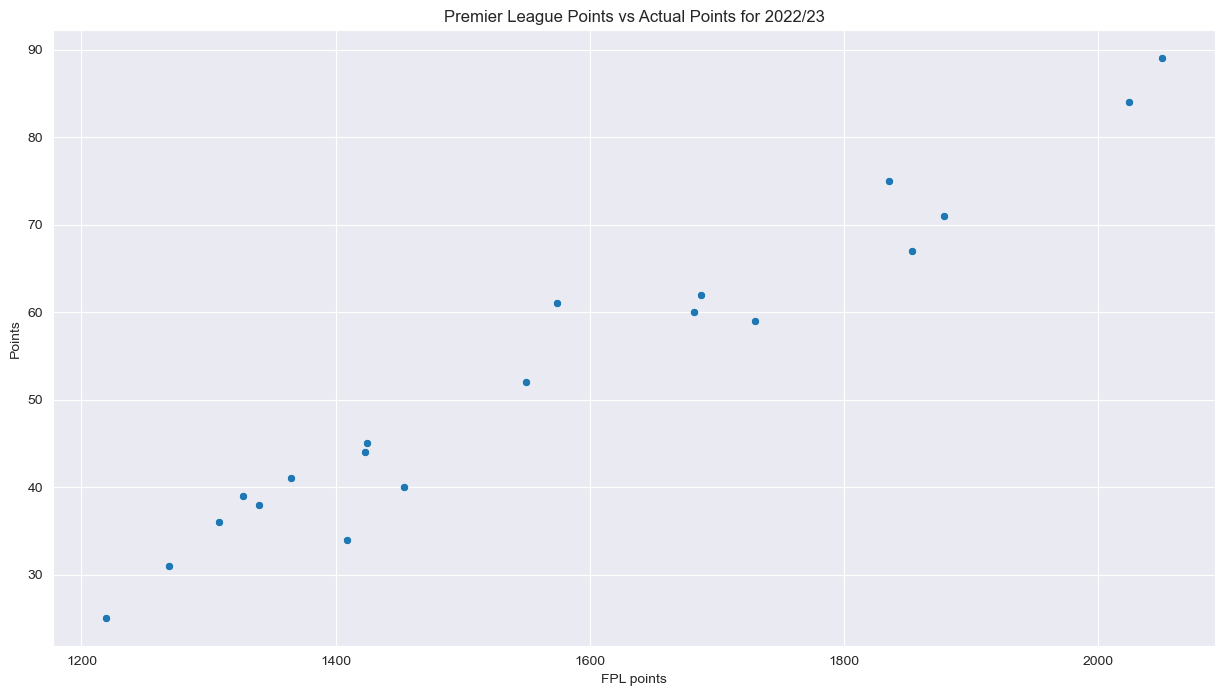

In [59]:
fpl_vs_points("2022/23")

### General EDA

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93199 entries, 0 to 93198
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        93199 non-null  object 
 1   position                    93199 non-null  object 
 2   team                        93199 non-null  object 
 3   xP                          93199 non-null  float64
 4   assists                     93199 non-null  int64  
 5   bonus                       93199 non-null  int64  
 6   bps                         93199 non-null  int64  
 7   clean_sheets                93199 non-null  int64  
 8   creativity                  93199 non-null  float64
 9   element                     93199 non-null  int64  
 10  fixture                     93199 non-null  int64  
 11  goals_conceded              93199 non-null  int64  
 12  goals_scored                93199 non-null  int64  
 13  ict_index                   931

In [62]:
new_df_use = new_df[["goals_scored", "goals_conceded", "total_points", "assists", "clean_sheets", "minutes"]]

In [67]:
def hist(year, var):
    new_data = new_df[new_df["season"] == year]
    plt.figure(figsize=(16,8))
    sns.histplot(x = var, data = new_data)
    plt.xlabel(var)
    plt.title("A distribution of %s during the season of %s"%(var, year))
    plt.show()